In [1]:
import urllib.request

client_id = 'a2CX1cdZ6h5Ho4D4boOD'
client_secret = 'BwGKb34Tvs'

In [2]:
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

gen_search_url('book', '파이썬', 10, 3)

'https://openapi.naver.com/v1/search/book.json?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&start=10&display=3'

In [5]:
import json
import datetime

def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    
    response = urllib.request.urlopen(request)
    
    print("[%s] Url Request Success" % datetime.datetime.now())
    
    return json.loads(response.read().decode('utf-8'))

In [6]:
url = gen_search_url('book', '파이썬', 10, 3)
one_result = get_result_onpage(url)

[2020-11-23 16:17:33.806987] Url Request Success


In [7]:
one_result

{'lastBuildDate': 'Mon, 23 Nov 2020 16:17:33 +0900',
 'total': 1157,
 'start': 10,
 'display': 3,
 'items': [{'title': 'Do it! 첫 <b>파이썬</b> (게임하듯 배우는 나의 첫 프로그래밍 책)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=16324192',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/163/241/16324192.jpg?type=m1&udate=20200930',
   'author': '엘리스 코딩',
   'price': '14000',
   'discount': '12600',
   'publisher': '이지스퍼블리싱',
   'pubdate': '20200410',
   'isbn': '1163031569 9791163031567',
   'description': '왕초보 맞춤 <b>파이썬</b> 입문서초등 고학년부터 필수인 코딩, 주인공 ‘엘리스 토끼’와 함께 게임하듯 배우세요. 176가지 그림과 45가지 코딩 문제를 풀다... 마지막 과제인 ‘점심 메뉴 추첨기’ 프로그램까지 만들면 ‘<b>파이썬</b> 이수증’도 드립니다. 제대로 설계된 코딩 교육 콘텐츠를 찾는 학생·학부모·선생님은... '},
  {'title': '<b>파이썬</b> for Beginner (쉽고 빠르게 익히는 프로그래밍의 기본 원리)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=15871779',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/158/717/15871779.jpg?type=m1&udate=20200912',
   'author': '우재남',
   'price': '23000',
   'discount'

In [13]:
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    
    return input_str

In [14]:
import pandas as pd

def get_field(json_data):
    title = [delete_tag(each['title']) for each in json_data['items']]
    link = [each['link'] for each in json_data['items']]
    price = [each['price'] for each in json_data['items']]
    publisher = [each['publisher'] for each in json_data['items']]
    isbn = [each['isbn'].split()[0] for each in json_data['items']]
    
    result_pd = pd.DataFrame({'title' : title, 'price': price, 'isbn': isbn,
                             'link': link, 'publisher': publisher},
                            columns=['title', 'price', 'publisher', 'isbn', 'link'])
    
    return result_pd

In [15]:
url = gen_search_url('book', '파이썬', 10, 3)
json_result = get_result_onpage(url)
pd_result = get_field(json_result)
pd_result

[2020-11-23 16:24:03.906444] Url Request Success


,title,price,publisher,isbn,link
0,Do it! 첫 파이썬 (게임하듯 배우는 나의 첫 프로그래밍 책),14000,이지스퍼블리싱,1163031569,http://book.naver.com/bookdb/book_detail.php?b...
1,파이썬 for Beginner (쉽고 빠르게 익히는 프로그래밍의 기본 원리),23000,한빛아카데미,1156644666,http://book.naver.com/bookdb/book_detail.php?b...
2,혼자 공부하는 첫 프로그래밍 with 파이썬 (1:1 과외하듯 배우는 왕초보 코딩 ...,17000,한빛미디어,1162243031,http://book.naver.com/bookdb/book_detail.php?b...


In [17]:
result_book = []

for n in range(1, 1000, 100):
    url = gen_search_url('book', '파이썬', n, 100)
    json_result = get_result_onpage(url)
    pd_result = get_field(json_result)
    
    result_book.append(pd_result)
    
result_book = pd.concat(result_book)

[2020-11-23 16:25:35.399414] Url Request Success
[2020-11-23 16:25:35.895503] Url Request Success
[2020-11-23 16:25:36.252800] Url Request Success
[2020-11-23 16:25:36.653457] Url Request Success
[2020-11-23 16:25:37.024241] Url Request Success
[2020-11-23 16:25:37.405739] Url Request Success
[2020-11-23 16:25:37.852786] Url Request Success
[2020-11-23 16:25:38.263590] Url Request Success
[2020-11-23 16:25:38.810107] Url Request Success
[2020-11-23 16:25:39.439901] Url Request Success


In [19]:
result_book.reset_index(drop=True, inplace=True)
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1000 non-null   object
 1   price      1000 non-null   object
 2   publisher  1000 non-null   object
 3   isbn       1000 non-null   object
 4   link       1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [20]:
result_book['price'] = result_book['price'].astype('float')
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   price      1000 non-null   float64
 2   publisher  1000 non-null   object 
 3   isbn       1000 non-null   object 
 4   link       1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [22]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

url = "https://book.naver.com/bookdb/book_detail.nhn?bid=14922211"
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
soup

<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>
책정보, 파이썬 라이브러리를 활용한 데이터 분석 : 네이버 책</title>
<meta content="article" property="og:type"/>
<meta content="파이썬 라이브러리를 활용한 데이터 분석" property="og:title"/>
<meta content="http://book.naver.com/bookdb/book_detail.nhn?bid=14922211" property="og:url"/>
<meta content="https://bookthumb-phinf.pstatic.net/cover/149/222/14922211.jpg?type=m5" property="og:image"/>
<meta content="빅데이터 분석에 관한 가장 완벽한 교재!이 책은 NUMPY, PANDAS, MATPLOTLIB, IPYTHON, JUPYTER 등 다양한 파이썬 라이브러리를 사용해서 효과적으로 데이터를 분석하는 방법을 알려준다. PANDAS의 새로운 기능뿐만 아니라 메모리 사용량을 줄이고 성능을 개선하는 고급 사용법까지 다룬다. 또한 모델링 도구인 STATSMODELS와 SCIKIT-LEARN 라이브러리도 소개한다. 연대별 이름 통계 자료, 미 대선 데이터베이스 자료 등 실사례로 따라 하다 보면 어느덧 여러분도 데이터에 알맞게 접근하고 효과적으로 분석하는 전문가가 될 것이다." property="og:description"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버 책" property="og:article:author"/>
<meta co

In [23]:
soup.find_all(class_ = "book_info")

[<div class="book_info">
 <h2><a class="N=a:bil.title,i:98000001_000000000000000000E3B1E3" href="/bookdb/book_detail.nhn?bid=14922211">파이썬 라이브러리를 활용한 데이터 분석 <span>영화 평점, 이름 통계, 선거 데이터 등 실사례 사용</span></a></h2>
 <div class="thumb type_end">
 <div class="thumb_type">
 <a class="N=a:bil.image,i:98000001_000000000000000000E3B1E3" href="javascript:showLayerBookImage();">
 <img alt="파이썬 라이브러리를 활용한 데이터 분석" onerror="emptyImg(this, 'm140')" src="https://bookthumb-phinf.pstatic.net/cover/149/222/14922211.jpg?type=m140&amp;udate=20201111"/>
 <span class="mask"><span class="bg1"></span><span class="bg2"></span></span>
 </a>
 </div>
 </div>
 <div class="book_info_inner">
 <div class="txt_desc">
 <a class="N=a:bil.point,i:98000001_000000000000000000E3B1E3" href="/bookdb/review.nhn?bid=14922211" id="txt_desc_point">
 <div class="review_point2"><span style="width:0.0%;">별점</span></div>
 <strong>0.0<span class="blind">점</span></strong> <span class="bar">|</span> 네티즌리뷰 <strong> 2</strong><span class="cnt

In [24]:
tmp = soup.find_all(class_ = "book_info")[0].get_text()
tmp

'\n파이썬 라이브러리를 활용한 데이터 분석\xa0영화 평점, 이름 통계, 선거 데이터 등 실사례 사용\n\n\n\n\n\n\n\n\n\n\n\n별점\n0.0점 | 네티즌리뷰  2건\n\n\n저자 웨스 맥키니|역자 김영근|한빛미디어\n|2019.05.20\n원제 Python for data analysis\n페이지 664|ISBN  9791162241905|판형 규격외 변형\n\n\n도서\n31500원\n35000원\n-10%\n\n\nebook 28000 | 25200\n25200원\n28000원\n-10%\n\n\n\n\n\n가격정보\n\n\n\n\n\n\n\n\n\n\nISBN이란?\n국제표준도서번호(International Standard Book Number)로서, 국제적으로 표준화된방법에 따라 전세계에서 생산되는 도서에부여된 고유번호를 말합니다.\n\n\n\n'

In [25]:
import re

tmp = soup.find_all(class_ = "book_info")[0].get_text()
result = re.search('페이지\s+\d+', tmp)

result.group()

'페이지 664'

In [26]:
import re
import numpy as np

def get_page_num(soup):
    tmp = soup.find_all(class_ = "book_info")[0].get_text()
    
    try:
        result = re.search('페이지\s+\d+', tmp).group()
        return result.split()[1]
    except:
        print('==> Error in get_page_num')
        return np.nan
get_page_num(soup)

'664'

In [27]:
import time

page_num_col = []
for url in result_book['link']:
    print(url)
    print(time.time())
    
    try:
        page_num = get_page_num(BeautifulSoup(urlopen(url), 'html.parser'))
        page_num_col.append(page_num)
    except:
        print('==> Error in urlopen')
        page_num_col.append(np.nan)
        
    print(len(page_num_col))
    time.sleep(0.5)
    
result_book['page_num'] = page_num_col

http://book.naver.com/bookdb/book_detail.php?bid=16439154
1606117988.941175
1
http://book.naver.com/bookdb/book_detail.php?bid=16406247
1606117989.7848976
2
http://book.naver.com/bookdb/book_detail.php?bid=15028688
1606117990.750933
3
http://book.naver.com/bookdb/book_detail.php?bid=15052904
1606117991.5805557
4
http://book.naver.com/bookdb/book_detail.php?bid=16238302
1606117992.4331093
5
http://book.naver.com/bookdb/book_detail.php?bid=16437083
1606117993.213101
6
http://book.naver.com/bookdb/book_detail.php?bid=14820571
1606117993.998984
7
http://book.naver.com/bookdb/book_detail.php?bid=14126163
1606117994.8137844
8
http://book.naver.com/bookdb/book_detail.php?bid=16778336
1606117995.598871
9
http://book.naver.com/bookdb/book_detail.php?bid=16324192
1606117996.4435363
10
http://book.naver.com/bookdb/book_detail.php?bid=15871779
1606117997.2867062
11
http://book.naver.com/bookdb/book_detail.php?bid=16385280
1606117998.0806034
12
http://book.naver.com/bookdb/book_detail.php?bid=14922

103
http://book.naver.com/bookdb/book_detail.php?bid=15303795
1606118073.9655902
104
http://book.naver.com/bookdb/book_detail.php?bid=15655682
1606118074.790189
105
http://book.naver.com/bookdb/book_detail.php?bid=11659351
1606118075.5973713
106
http://book.naver.com/bookdb/book_detail.php?bid=16261477
1606118076.4131253
107
http://book.naver.com/bookdb/book_detail.php?bid=16897193
1606118077.201611
==> Error in get_page_num
108
http://book.naver.com/bookdb/book_detail.php?bid=14649782
1606118077.9729424
109
http://book.naver.com/bookdb/book_detail.php?bid=15371024
1606118078.7959502
110
http://book.naver.com/bookdb/book_detail.php?bid=14261060
1606118079.642685
111
http://book.naver.com/bookdb/book_detail.php?bid=16030770
1606118080.4021502
112
http://book.naver.com/bookdb/book_detail.php?bid=10882789
1606118081.190073
113
http://book.naver.com/bookdb/book_detail.php?bid=16388863
1606118081.9846454
114
http://book.naver.com/bookdb/book_detail.php?bid=12231444
1606118082.8346152
115
ht

204
http://book.naver.com/bookdb/book_detail.php?bid=12569834
1606118155.3493023
205
http://book.naver.com/bookdb/book_detail.php?bid=14791962
1606118156.1003883
206
http://book.naver.com/bookdb/book_detail.php?bid=15369104
1606118156.888039
207
http://book.naver.com/bookdb/book_detail.php?bid=11637415
1606118157.6808023
208
http://book.naver.com/bookdb/book_detail.php?bid=13428069
1606118158.5078466
209
http://book.naver.com/bookdb/book_detail.php?bid=16110021
1606118159.274
210
http://book.naver.com/bookdb/book_detail.php?bid=14365321
1606118160.069717
211
http://book.naver.com/bookdb/book_detail.php?bid=16313682
1606118160.8457658
212
http://book.naver.com/bookdb/book_detail.php?bid=14381018
1606118161.6059015
213
http://book.naver.com/bookdb/book_detail.php?bid=12799891
1606118162.374441
214
http://book.naver.com/bookdb/book_detail.php?bid=16293168
1606118163.1659756
215
http://book.naver.com/bookdb/book_detail.php?bid=15261531
1606118164.2961757
216
http://book.naver.com/bookdb/bo

306
http://book.naver.com/bookdb/book_detail.php?bid=9766336
1606118259.576231
307
http://book.naver.com/bookdb/book_detail.php?bid=13608563
1606118260.3884835
308
http://book.naver.com/bookdb/book_detail.php?bid=9509682
1606118261.1934373
309
http://book.naver.com/bookdb/book_detail.php?bid=13484482
1606118262.0011952
310
http://book.naver.com/bookdb/book_detail.php?bid=16109063
1606118262.8006516
311
http://book.naver.com/bookdb/book_detail.php?bid=10503671
1606118263.604321
312
http://book.naver.com/bookdb/book_detail.php?bid=7145997
1606118264.4057631
313
http://book.naver.com/bookdb/book_detail.php?bid=16331909
1606118265.2145214
314
http://book.naver.com/bookdb/book_detail.php?bid=12114217
1606118265.9791262
315
http://book.naver.com/bookdb/book_detail.php?bid=9531723
1606118266.7742064
316
http://book.naver.com/bookdb/book_detail.php?bid=12225269
1606118267.5625064
317
http://book.naver.com/bookdb/book_detail.php?bid=11627834
1606118268.3410172
318
http://book.naver.com/bookdb/b

404
http://book.naver.com/bookdb/book_detail.php?bid=13877310
1606118338.252013
==> Error in get_page_num
405
http://book.naver.com/bookdb/book_detail.php?bid=9007939
1606118339.0191844
406
http://book.naver.com/bookdb/book_detail.php?bid=11912927
1606118339.8064663
407
http://book.naver.com/bookdb/book_detail.php?bid=12542762
1606118340.6324432
408
http://book.naver.com/bookdb/book_detail.php?bid=12010653
1606118341.4393733
409
http://book.naver.com/bookdb/book_detail.php?bid=9832716
1606118342.274826
410
http://book.naver.com/bookdb/book_detail.php?bid=15974197
1606118343.082666
411
http://book.naver.com/bookdb/book_detail.php?bid=13642670
1606118343.849409
==> Error in get_page_num
412
http://book.naver.com/bookdb/book_detail.php?bid=13606511
1606118344.6202133
413
http://book.naver.com/bookdb/book_detail.php?bid=11956991
1606118345.4378147
414
http://book.naver.com/bookdb/book_detail.php?bid=13128617
1606118346.2293591
==> Error in get_page_num
415
http://book.naver.com/bookdb/book

503
http://book.naver.com/bookdb/book_detail.php?bid=14026591
1606118419.343989
504
http://book.naver.com/bookdb/book_detail.php?bid=8625586
1606118420.2836125
505
http://book.naver.com/bookdb/book_detail.php?bid=15056266
1606118421.1261184
506
http://book.naver.com/bookdb/book_detail.php?bid=15301644
1606118421.973303
507
http://book.naver.com/bookdb/book_detail.php?bid=13608509
1606118422.7572627
508
http://book.naver.com/bookdb/book_detail.php?bid=11477892
1606118423.6059022
509
http://book.naver.com/bookdb/book_detail.php?bid=15620279
1606118424.4350245
510
http://book.naver.com/bookdb/book_detail.php?bid=8819504
1606118425.2328541
511
http://book.naver.com/bookdb/book_detail.php?bid=12538653
1606118426.0449903
512
http://book.naver.com/bookdb/book_detail.php?bid=15654371
1606118426.8337665
513
http://book.naver.com/bookdb/book_detail.php?bid=12671408
1606118427.5980883
514
http://book.naver.com/bookdb/book_detail.php?bid=10976142
1606118428.384011
515
http://book.naver.com/bookdb/

605
http://book.naver.com/bookdb/book_detail.php?bid=12556028
1606118502.3069298
606
http://book.naver.com/bookdb/book_detail.php?bid=15972530
1606118503.189462
607
http://book.naver.com/bookdb/book_detail.php?bid=14364922
1606118503.9978032
608
http://book.naver.com/bookdb/book_detail.php?bid=11823283
1606118504.90448
609
http://book.naver.com/bookdb/book_detail.php?bid=16362170
1606118505.714143
610
http://book.naver.com/bookdb/book_detail.php?bid=12307278
1606118506.5297928
611
http://book.naver.com/bookdb/book_detail.php?bid=16363359
1606118507.3171153
612
http://book.naver.com/bookdb/book_detail.php?bid=16291510
1606118508.1123505
613
http://book.naver.com/bookdb/book_detail.php?bid=16391228
1606118508.8978252
614
http://book.naver.com/bookdb/book_detail.php?bid=16404999
1606118509.6596408
615
http://book.naver.com/bookdb/book_detail.php?bid=13540082
1606118510.4338343
616
http://book.naver.com/bookdb/book_detail.php?bid=15620572
1606118511.240359
617
http://book.naver.com/bookdb/

706
http://book.naver.com/bookdb/book_detail.php?bid=16244660
1606118586.934336
707
http://book.naver.com/bookdb/book_detail.php?bid=16710300
1606118587.7243984
708
http://book.naver.com/bookdb/book_detail.php?bid=9071199
1606118588.5220942
709
http://book.naver.com/bookdb/book_detail.php?bid=14093872
1606118589.312379
710
http://book.naver.com/bookdb/book_detail.php?bid=16428541
1606118590.2254798
711
http://book.naver.com/bookdb/book_detail.php?bid=14412476
1606118590.9879096
712
http://book.naver.com/bookdb/book_detail.php?bid=11912125
1606118591.7741427
713
http://book.naver.com/bookdb/book_detail.php?bid=10859533
1606118592.5723178
714
http://book.naver.com/bookdb/book_detail.php?bid=14467849
1606118593.3916206
715
http://book.naver.com/bookdb/book_detail.php?bid=15370657
1606118594.179546
716
http://book.naver.com/bookdb/book_detail.php?bid=16121345
1606118594.937593
717
http://book.naver.com/bookdb/book_detail.php?bid=9414612
1606118595.696977
718
http://book.naver.com/bookdb/bo

808
http://book.naver.com/bookdb/book_detail.php?bid=10598980
1606118669.0301461
809
http://book.naver.com/bookdb/book_detail.php?bid=16261634
1606118669.8182688
==> Error in get_page_num
810
http://book.naver.com/bookdb/book_detail.php?bid=14533437
1606118670.592095
811
http://book.naver.com/bookdb/book_detail.php?bid=6977530
1606118671.3858962
812
http://book.naver.com/bookdb/book_detail.php?bid=12723493
1606118672.176926
813
http://book.naver.com/bookdb/book_detail.php?bid=14095491
1606118672.9662502
814
http://book.naver.com/bookdb/book_detail.php?bid=16237784
1606118673.762184
815
http://book.naver.com/bookdb/book_detail.php?bid=15043446
1606118674.5604317
816
http://book.naver.com/bookdb/book_detail.php?bid=13416225
1606118675.385652
817
http://book.naver.com/bookdb/book_detail.php?bid=15703760
1606118676.1944141
818
http://book.naver.com/bookdb/book_detail.php?bid=12723491
1606118676.9817839
819
http://book.naver.com/bookdb/book_detail.php?bid=13416226
1606118677.8255842
820
htt

907
http://book.naver.com/bookdb/book_detail.php?bid=14124851
1606118748.7631662
908
http://book.naver.com/bookdb/book_detail.php?bid=10346802
1606118749.5414429
909
http://book.naver.com/bookdb/book_detail.php?bid=6986183
1606118750.356754
910
http://book.naver.com/bookdb/book_detail.php?bid=9555990
1606118751.2007952
911
http://book.naver.com/bookdb/book_detail.php?bid=8752121
1606118752.0846562
912
http://book.naver.com/bookdb/book_detail.php?bid=12547671
1606118752.8793046
913
http://book.naver.com/bookdb/book_detail.php?bid=13762204
1606118753.6638243
914
http://book.naver.com/bookdb/book_detail.php?bid=10462873
1606118754.4756665
915
http://book.naver.com/bookdb/book_detail.php?bid=13975256
1606118755.3123076
==> Error in get_page_num
916
http://book.naver.com/bookdb/book_detail.php?bid=11777815
1606118756.0855644
917
http://book.naver.com/bookdb/book_detail.php?bid=10454818
1606118756.893111
918
http://book.naver.com/bookdb/book_detail.php?bid=7342676
1606118757.7647789
919
http

In [30]:
len(page_num_col)

1000

In [31]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   price      1000 non-null   float64
 2   publisher  1000 non-null   object 
 3   isbn       1000 non-null   object 
 4   link       1000 non-null   object 
 5   page_num   959 non-null    object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [32]:
result_book['page_num'] = result_book['page_num'].astype('float')

In [34]:
for idx, row in result_book.iterrows():
    if np.isnan(row['page_num']):
        print('Start fix')
        print(row['link'])
        page_num = get_page_num(BeautifulSoup(urlopen(row['link']), 'html.parser'))
        result_book.loc[idx, 'page_num'] = page_num
        time.sleep(0.5)

Start fix
http://book.naver.com/bookdb/book_detail.php?bid=16897193
==> Error in get_page_num
Start fix
http://book.naver.com/bookdb/book_detail.php?bid=16428366
==> Error in get_page_num
Start fix
http://book.naver.com/bookdb/book_detail.php?bid=14451255
==> Error in get_page_num
Start fix
http://book.naver.com/bookdb/book_detail.php?bid=16592390
==> Error in get_page_num
Start fix
http://book.naver.com/bookdb/book_detail.php?bid=16293317
==> Error in get_page_num
Start fix
http://book.naver.com/bookdb/book_detail.php?bid=15768118
==> Error in get_page_num
Start fix
http://book.naver.com/bookdb/book_detail.php?bid=16032413
==> Error in get_page_num
Start fix
http://book.naver.com/bookdb/book_detail.php?bid=15872328
==> Error in get_page_num
Start fix
http://book.naver.com/bookdb/book_detail.php?bid=15476740
==> Error in get_page_num
Start fix
http://book.naver.com/bookdb/book_detail.php?bid=15519573
==> Error in get_page_num
Start fix
http://book.naver.com/bookdb/book_detail.php?bid=1

In [35]:
result_book['page_num'] = result_book['page_num'].astype('float')
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   price      1000 non-null   float64
 2   publisher  1000 non-null   object 
 3   isbn       1000 non-null   object 
 4   link       1000 non-null   object 
 5   page_num   959 non-null    float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [60]:
result_book = result_book[result_book['page_num'].notnull()]
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      959 non-null    object 
 1   price      959 non-null    float64
 2   publisher  959 non-null    object 
 3   isbn       959 non-null    object 
 4   link       959 non-null    object 
 5   page_num   959 non-null    float64
dtypes: float64(2), object(4)
memory usage: 52.4+ KB


In [61]:
writer = pd.ExcelWriter("./python_books.xlsx", engine='xlsxwriter')
result_book.to_excel(writer, sheet_name='Sheet1')

workbook = writer.book
worksheet = writer.sheets['Sheet1']
worksheet.set_column('A:A', 5)
worksheet.set_column('B:B', 60)
worksheet.set_column('C:C', 10)
worksheet.set_column('D:D', 15)
worksheet.set_column('E:E', 10)
worksheet.set_column('F:F', 50)

writer.save()

In [37]:
!pip list

Package             Version
------------------- -------------------
argon2-cffi         20.1.0
async-generator     1.10
attrs               20.2.0
backcall            0.2.0
beautifulsoup4      4.9.3
bleach              3.2.1
branca              0.4.1
bs4                 0.0.1
certifi             2020.6.20
cffi                1.14.3
chardet             3.0.4
colorama            0.4.4
cycler              0.10.0
decorator           4.4.2
defusedxml          0.6.0
entrypoints         0.3
folium              0.11.0
graphviz            0.14.2
idna                2.10
importlib-metadata  2.0.0
ipykernel           5.3.4
ipython             7.18.1
ipython-genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.2
Jinja2              2.11.2
joblib              0.17.0
jsonschema          3.2.0
jupyter             1.0.0
jupyter-client      6.1.7
jupyter-console     6.2.0
jupyter-core        4.6.3
jupyterlab-pygments 0.1.2
kiwisolver          1.2.0
MarkupSafe          1.1.1
matplotlib  

In [62]:
raw_data = pd.read_excel('./python_books.xlsx', index_col=0)
raw_data.head()

,title,price,publisher,isbn,link,page_num
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,34000,한빛미디어,1162243074,http://book.naver.com/bookdb/book_detail.php?b...,604
1,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),38000,책만,1189909170,http://book.naver.com/bookdb/book_detail.php?b...,724
2,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),18000,한빛미디어,1162241888,http://book.naver.com/bookdb/book_detail.php?b...,460
3,Do it! 점프 투 파이썬,18800,이지스퍼블리싱,1163030910,http://book.naver.com/bookdb/book_detail.php?b...,360
4,파이썬 머신러닝 완벽 가이드 (다양한 캐글 예제와 함께 기초 알고리즘부터 최신 기법...,38000,위키북스,1158391927,http://book.naver.com/bookdb/book_detail.php?b...,648


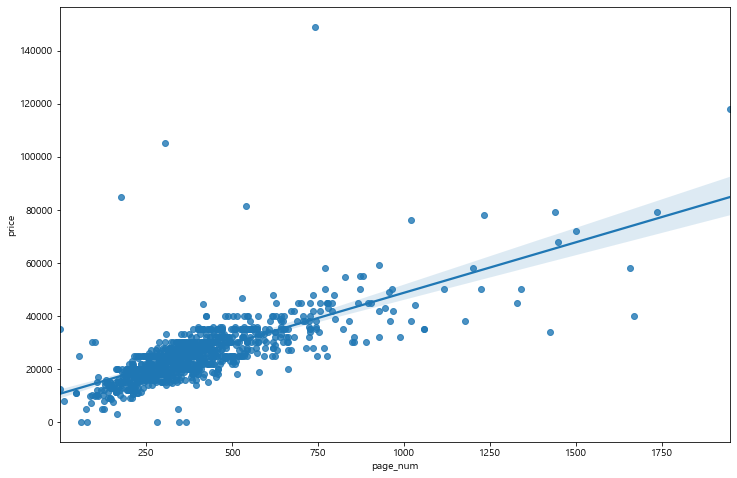

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
sns.regplot(x='page_num', y='price', data=raw_data);

In [64]:
raw_data[raw_data['price'] > 140000]

,title,price,publisher,isbn,link,page_num
861,CODECADEMY.COM PYTHON 2 가이드북 (인공지능 10만 양병 프로젝트),149000,오미글로벌,1196250243,http://book.naver.com/bookdb/book_detail.php?b...,742


In [65]:
raw_data['publisher'].value_counts().to_frame()

,publisher
에이콘출판,179
한빛미디어,106
위키북스,83
길벗,41
제이펍,40
...,...
한티에듀,1
킨더랜드,1
힐북,1
인디라이프,1


In [66]:
len(raw_data['publisher'].unique())

188

In [67]:
from matplotlib import font_manager

f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

c:\users\luvu1\anaconda3\envs\dss15\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



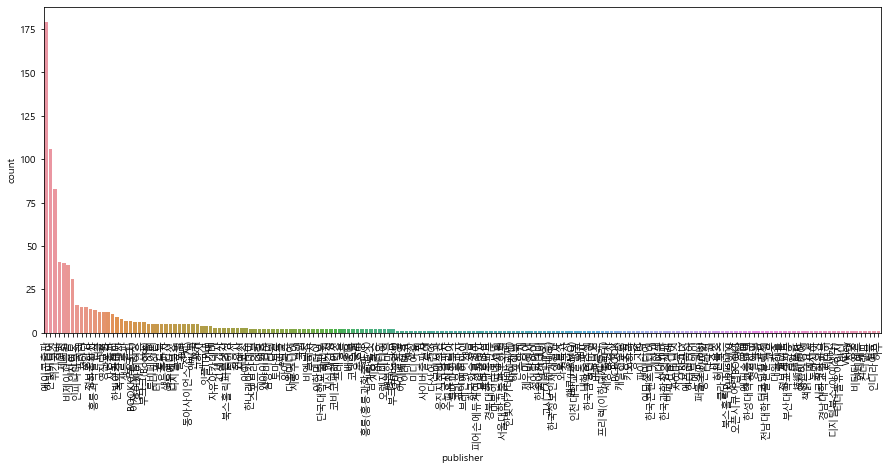

In [68]:
plt.figure(figsize=(15,6))
sns.countplot('publisher', data=raw_data, order=raw_data['publisher'].value_counts().index)
plt.xticks(rotation=90);

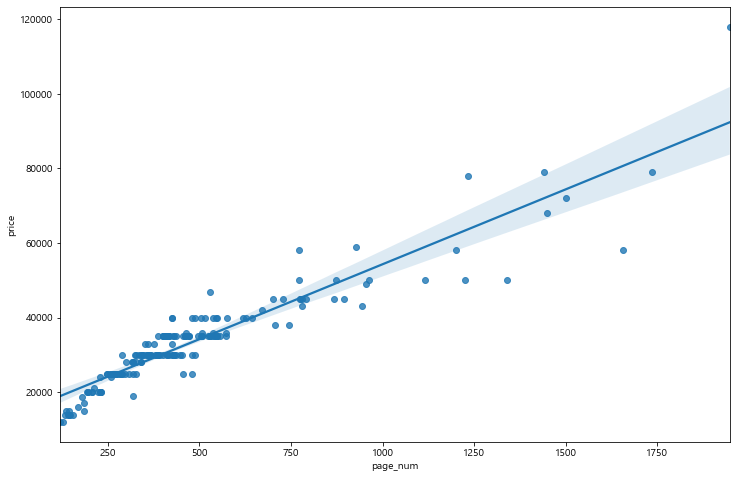

In [69]:
raw_1 = raw_data[raw_data['publisher'] == '에이콘출판']

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_1);

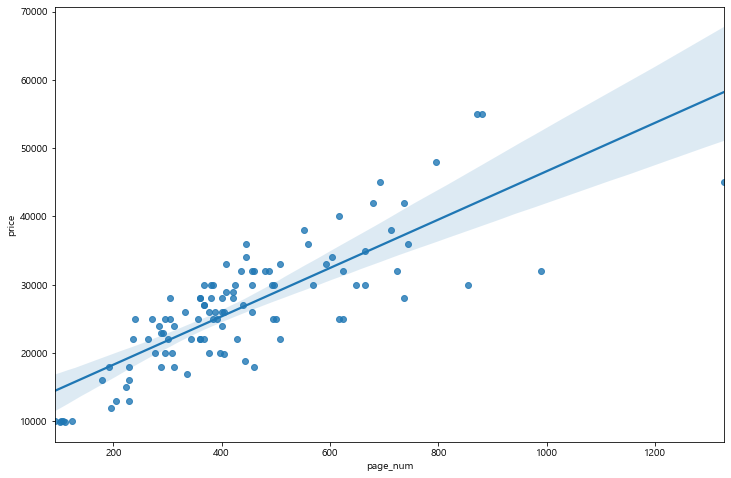

In [70]:
raw_2 = raw_data[raw_data['publisher'] == '한빛미디어']

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_2);

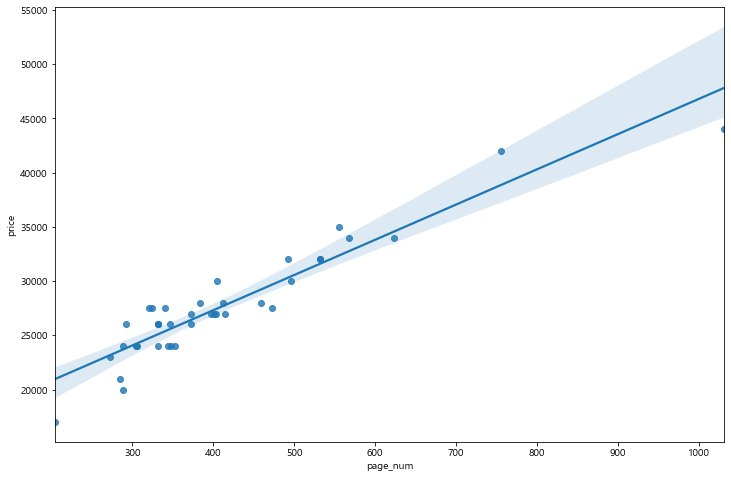

In [71]:
raw_3 = raw_data[raw_data['publisher'] == '비제이퍼블릭']

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_3);

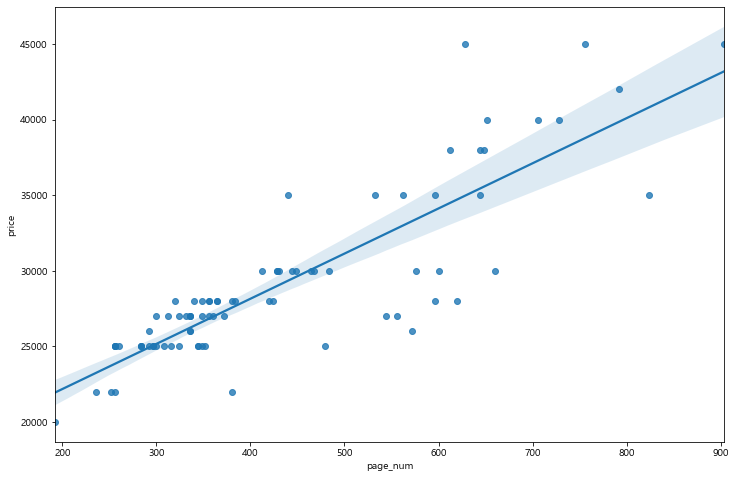

In [72]:
raw_4 = raw_data[raw_data['publisher'] == '위키북스']

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_4);

In [73]:
import plotly.express as px

px.box(raw_data, y='price')

In [74]:
from sklearn.model_selection import train_test_split

X = raw_data['page_num'].values
y = raw_data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [75]:
X_train, y_train

(array([[ 460],
        [ 492],
        [ 556],
        [ 264],
        [ 399],
        [ 328],
        [ 508],
        [ 328],
        [ 398],
        [ 305],
        [ 380],
        [ 210],
        [ 232],
        [ 228],
        [ 161],
        [ 340],
        [ 308],
        [ 332],
        [ 446],
        [ 448],
        [ 344],
        [ 364],
        [ 604],
        [ 368],
        [ 240],
        [ 526],
        [ 232],
        [ 456],
        [ 300],
        [ 276],
        [ 880],
        [ 376],
        [ 544],
        [1426],
        [ 264],
        [ 348],
        [ 404],
        [ 492],
        [ 312],
        [ 260],
        [ 756],
        [ 312],
        [ 726],
        [ 201],
        [  92],
        [ 304],
        [ 456],
        [ 592],
        [1668],
        [ 400],
        [ 494],
        [ 260],
        [ 308],
        [ 221],
        [ 212],
        [ 348],
        [ 524],
        [ 236],
        [ 412],
        [ 468],
        [ 180],
        [ 476],
        

In [76]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [77]:
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

RMSE of Train Data :  8245.045069198468
RMSE of Test Data :  5891.352108264345


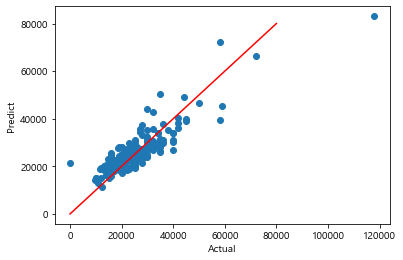

In [79]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.plot([0, 80000], [0, 80000], 'r');

In [80]:
X = raw_1['page_num'].values
y = raw_1['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [81]:
reg.fit(X_train, y_train)

LinearRegression()